# Draft: MIRI Spectral Extraction

***

## Imports
Describe the libraries we're using here. If there's something unusual, explain what the library is, and why we need it.
- *numpy* to handle array functions
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for creating tidy tables of the data
- *matplotlib.pyplot* for plotting data

In [1]:
# For style checking
# %load_ext pycodestyle_magic
# %flake8_on

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from astropy.visualization import simple_norm

import numpy as np
from astropy.io import fits
#from astropy.table import Table

## Introduction
Extract 1D spectra from 2D MIRI spectral observations.  Show simple "boxcar" extraction as well as a more sophisticated PSF based "optimal" extraction.  References needed for PSF based extractions.

### Defining terms
TBD

***

## Download File

In [27]:
# TBD

## File information

The downloaded file is a simulation of a LRS slit observation of for the star BD+60d1753, a flux calibration star.  This file was created with MIRISim (http://www.stsci.edu/jwst/science-planning/proposal-planning-toolbox/mirisim).
The simulated exposure was reduced using the JWST pipeline (v0.15.0, https://github.com/spacetelescope/jwst) through the Detector1 and Spec2 stages.

1. (Primary): This HDU contains meta-data related to the observation and data reduction.
2. (SCI): The calibrated image.
3. (ERR): Uncertainty image.
4. (DQ): Data quality image.
5. (VAR_POISSON): Unc. component 1: Poisson uncertainty image.
6. (VAR_RNOISE): Unc. component 2: Read Noise uncertainty image.
7. (VAR_FLAT): Unc. component 3: Flat Field uncertainty image.
8. (ASDF_METADATA): Metadata.

## Loading data

In [11]:
# load the data
infile = "det_image_seq1_MIRIMAGE_P750Lexp1_cal.fits"
hdu = fits.open(infile)
# calibrated image in 2nd HDU
data = hdu[1].data
# imwcs = wcs.WCS(hdu[0].header, hdu)

Basic information about the image.

In [12]:
print(hdu[1].data.shape)

(1024, 1032)


Display the full 2D image

Text(0.5, 1.0, 'The full image from the MIRI IMAGER detector')

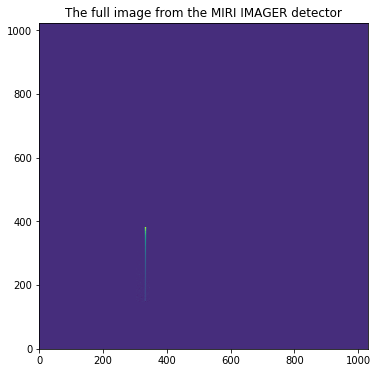

In [25]:
norm_data = simple_norm(data, 'sqrt')
plt.figure(figsize=(6, 6))
plt.imshow(data, norm=norm_data, origin="lower")
plt.title("The full image from the MIRI IMAGER detector")

Display the LRS Slit region

Text(0.5, 1.0, 'The full MIRI IMAGE detector image')

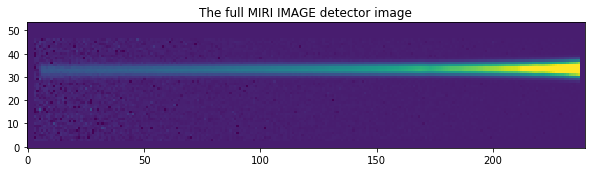

In [26]:
# python does y, x
# transpose to make it display better
data_lrs_reg = np.transpose(data[145:385, 300:354]) 

norm_data = simple_norm(data_lrs_reg, "sqrt", percent=99.)
plt.figure(figsize=(10, 3))
plt.imshow(data_lrs_reg, norm=norm_data, origin="lower")
plt.title("The full MIRI IMAGE detector image")

## Sections (xN)

The meat of your notebook should be sub-divided into sections with useful names to whatever extent makes sense base on the content. Break sections up with standard Markdown syntax headings:

```
# Section 1

Intro to section 1

### Sub-section 1a

More detailed info about Section 1

## Section 2

A complete thought that's as important as section 1 but doesn't need sub-sections.
```

## Exercises
Most notebooks are trying to convey _some_ information to their reader. It's often a good idea, if possible, to include in the notebook something where there is not an included answer so that the reader can cement in their mind how whatever it is they were supposed to learn from that notebook. If you do have exercise(s), be sure to leave a blank code cell underneath to show the user that it's meant for them to try it out right there. You may also want to include a "solutions" notebook next to your main notebook for the user to look at after they have finished their attempt.

## Aditional Resources
Provide links to appropriate JDox pages for MIRI LRS and JWST pipeline.

- [MAST API](https://mast.stsci.edu/api/v0/index.html)
- [Kepler Archive Page (MAST)](https://archive.stsci.edu/kepler/)
- [Kepler Archive Manual](https://archive.stsci.edu/kepler/manuals/archive_manual.pdf)
- [Exo.MAST website](https://exo.mast.stsci.edu/exo/ExoMast/html/exomast.html)

## About this notebook

**Author:** Karl Gordon, JWST
**Updated On:** 2020-04-01

***

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 